In [1]:
import seaborn as sns
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import ast
import numpy as np
import matplotlib.colors as mcolors

In [13]:
# df = pd.read_csv('../results/CATE final.csv')
df = pd.read_csv('../results/CATE  20241128-1431.csv')
df['T'] = df['T1'] + df['T2']
df['T_bound'] = df['Theorem 3.1'].str.extract(r'1\.\s*\d+\s*<=\s*(\d+\.?\d*)')
df['T_bound'] = df['T_bound'].astype(float)
df['First Model Initial Brier'] = df['Initial Brier'].apply(lambda x: ast.literal_eval(x)[0])
df['First Model Final Brier'] = df['Final Brier'].apply(lambda x: ast.literal_eval(x)[0])
df_twin = df[df['Data']=='Twin_Data']
df_national = df[df['Data']=='National_Study_Data']

df_twin = df_twin[df_twin['T']<50]
df_twin['T'].describe()

count    332.000000
mean       3.021084
std        1.382729
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: T, dtype: float64

468
173


In [14]:
df_national['T'].describe()

count    276.000000
mean       8.184783
std        3.439649
min        0.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       18.000000
Name: T, dtype: float64

In [8]:
df_twin['T_bound'].describe()

count      332.000000
mean     53376.506024
std       5789.859024
min      40000.000000
25%      49750.000000
50%      53000.000000
75%      58000.000000
max      70000.000000
Name: T_bound, dtype: float64

In [9]:
df_national['T_bound'].describe()

count       276.000000
mean     150195.652174
std       29714.363517
min       80000.000000
25%      129750.000000
50%      147000.000000
75%      166250.000000
max      243000.000000
Name: T_bound, dtype: float64

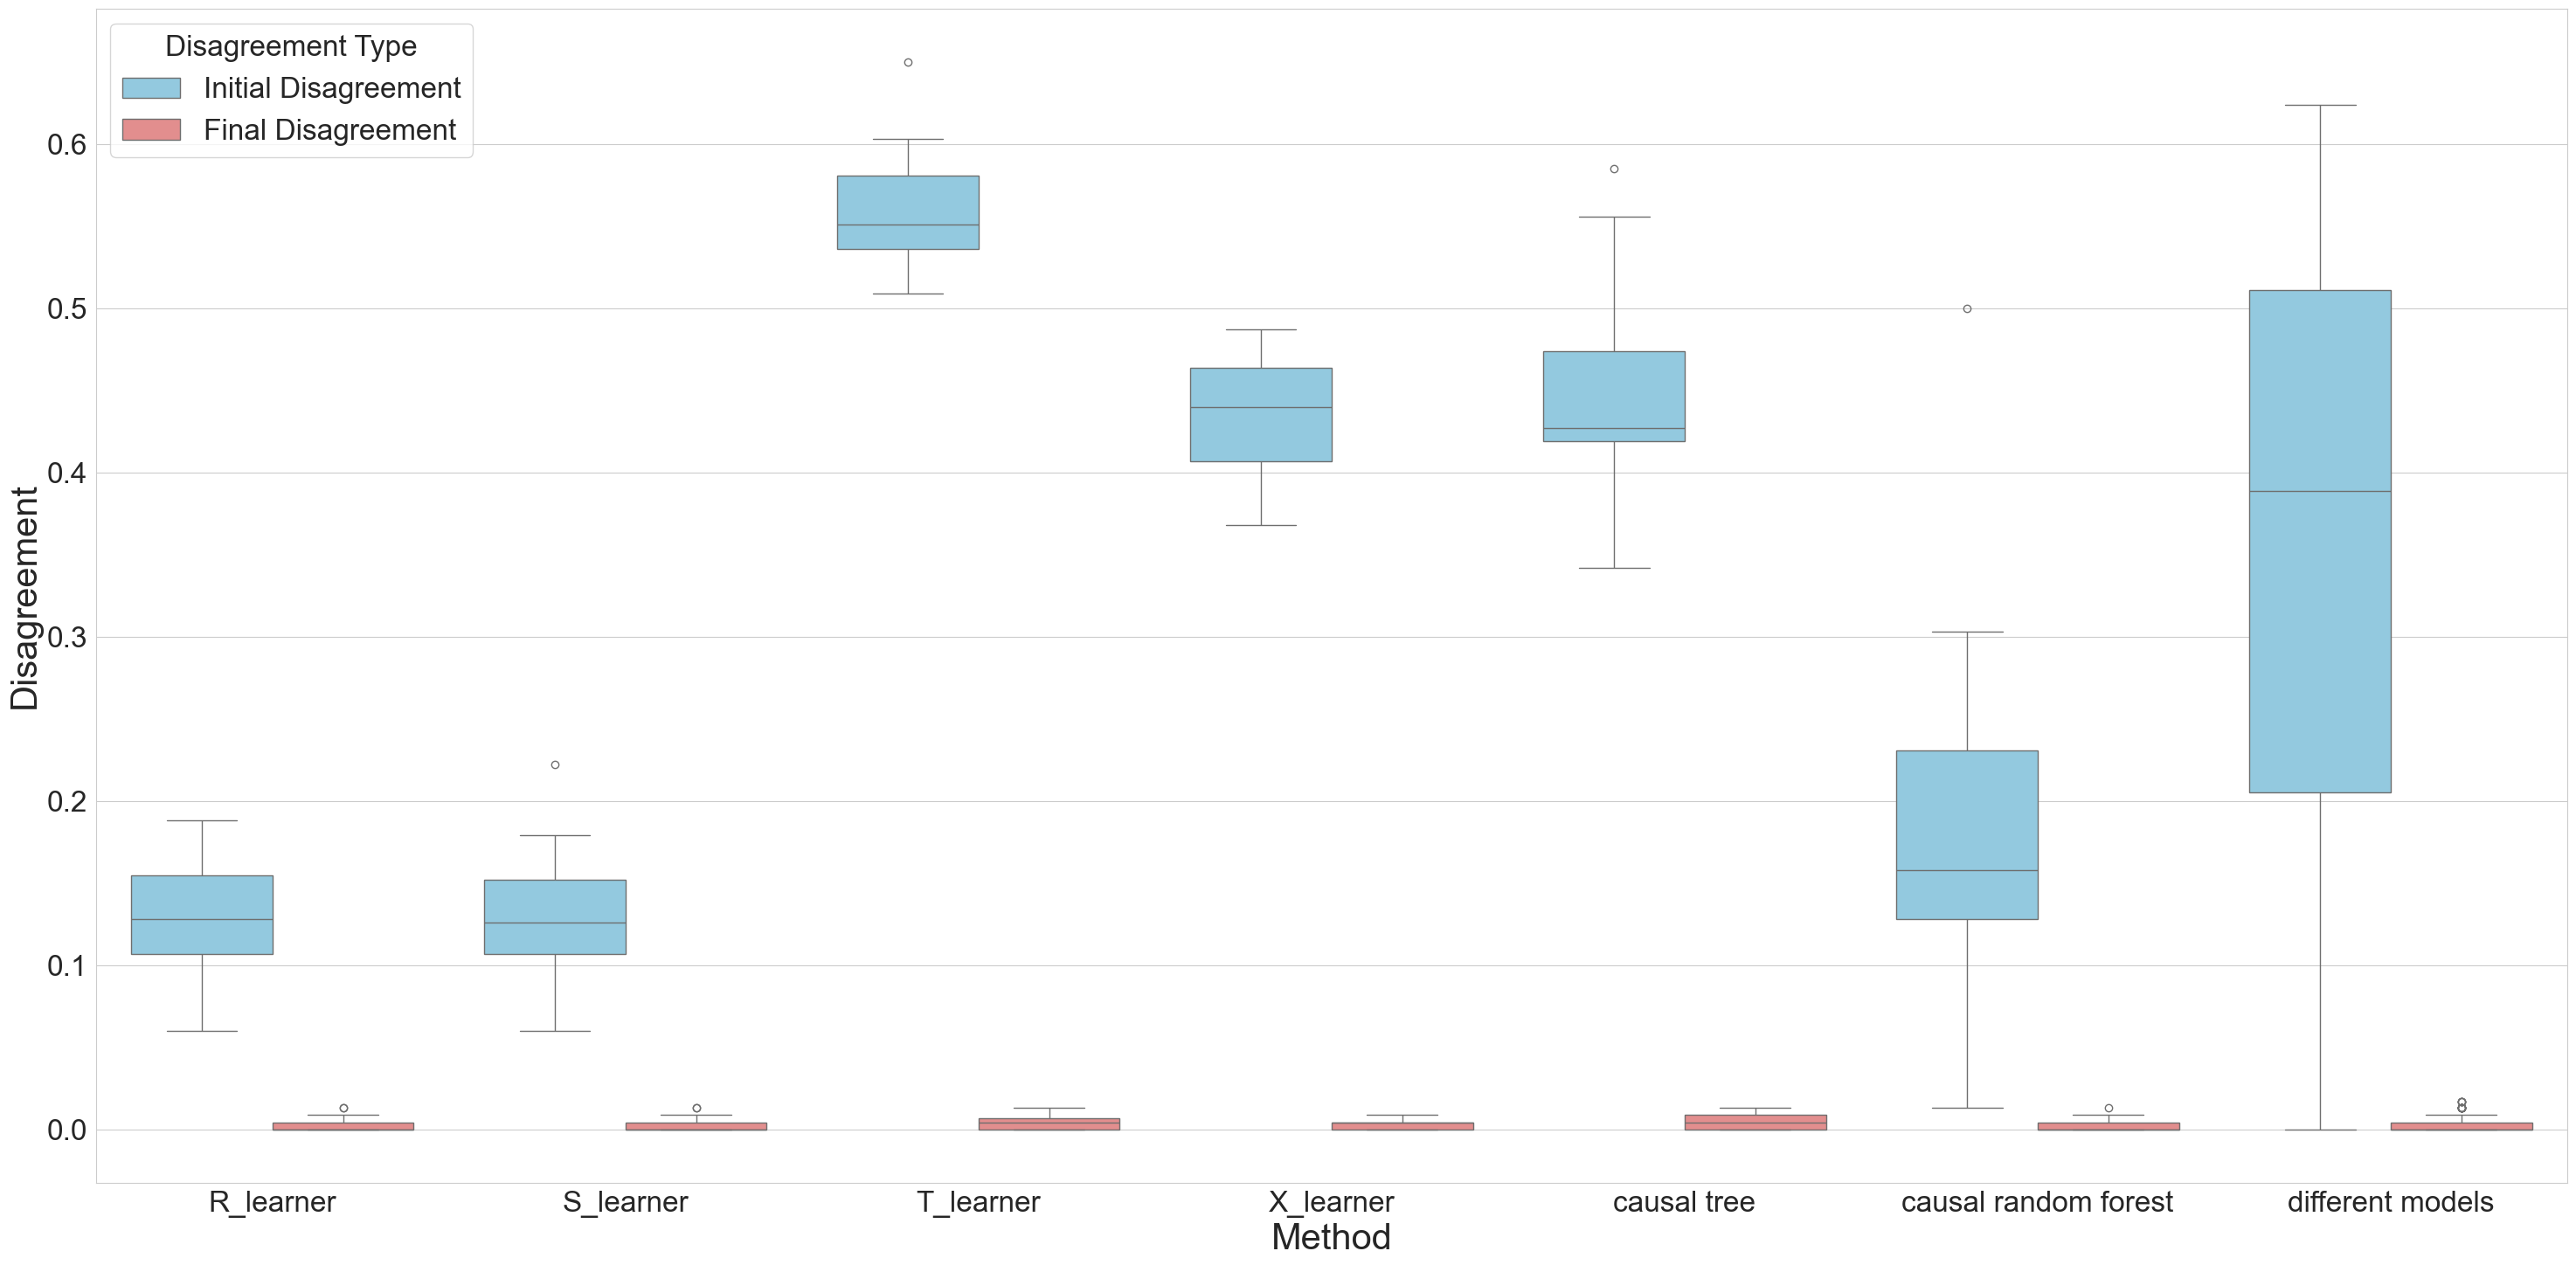

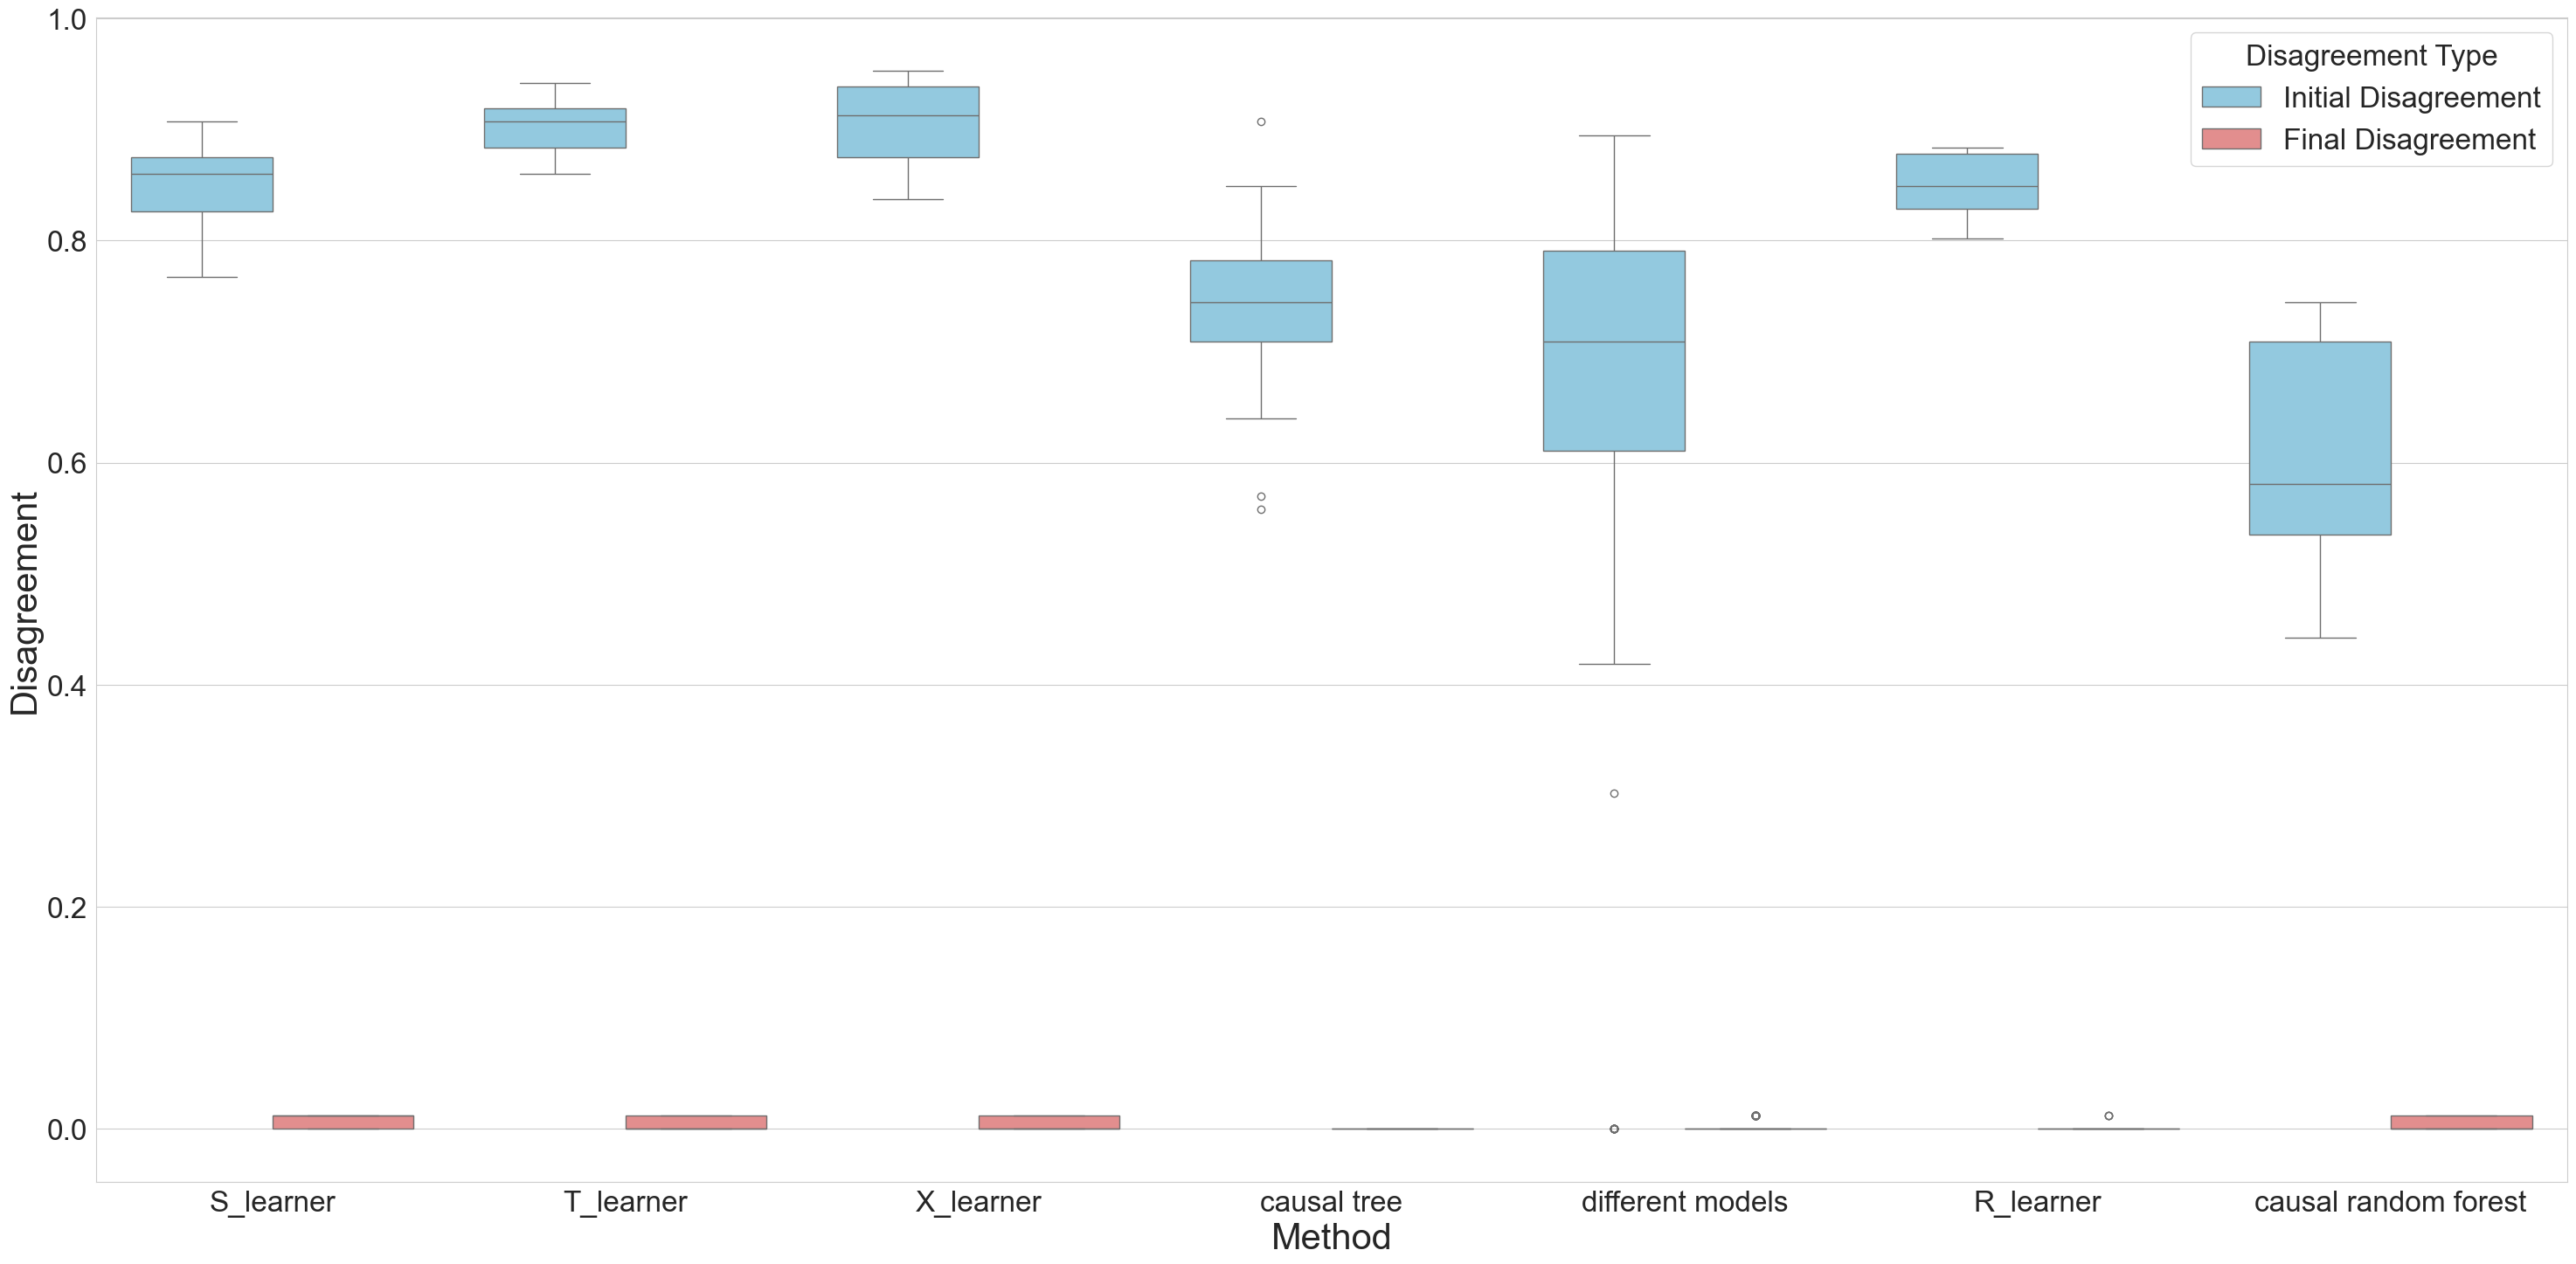

In [15]:
datasets = [df_twin, df_national]
titles = ['Twin Data', 'National Study Data']

# fig, axes = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
# Loop through each dataset and create a plot
for i, (df, title) in enumerate(zip(datasets, titles)):
    fig, ax = plt.subplots(1, figsize=(30, 15), sharey=True)  # Create a figure for each dataset
    
    # Replace 'Method' value for consistent labeling
    df.loc[df['Method'] == 'different models', 'Models'] = 'different models'
    df.loc[df['Models'] == 'Tree', 'Models'] = 'causal tree'
    df.loc[df['Models'] == 'Forest', 'Models'] = 'causal random forest'
    
    # Melt the dataset
    df_melted = pd.melt(df, id_vars=['Models'], 
                        value_vars=['Initial Disagreement', 'Final Disagreement'], 
                        var_name='Disagreement Type', value_name='Disagreement')
    
    # Create the boxplot
    sns.boxplot(x='Models', y='Disagreement', hue='Disagreement Type', data=df_melted, 
                ax=ax, palette={'Initial Disagreement': 'skyblue', 'Final Disagreement': 'lightcoral'})
    
    # Set labels and title
    # ax.set_title(title)
    ax.set_xlabel('Method')
    ax.set_ylabel('Disagreement')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Disagreement Type')
    plt.rcParams.update({
    'axes.labelsize': 30,  # Font size for axis labels
    'axes.titlesize': 36,  # Font size for plot titles
    'xtick.labelsize': 24,  # Font size for x-axis tick labels
    'ytick.labelsize': 24,  # Font size for y-axis tick labels
    'legend.fontsize': 24,  # Font size for legend
    'font.size': 24         # General font size
})
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

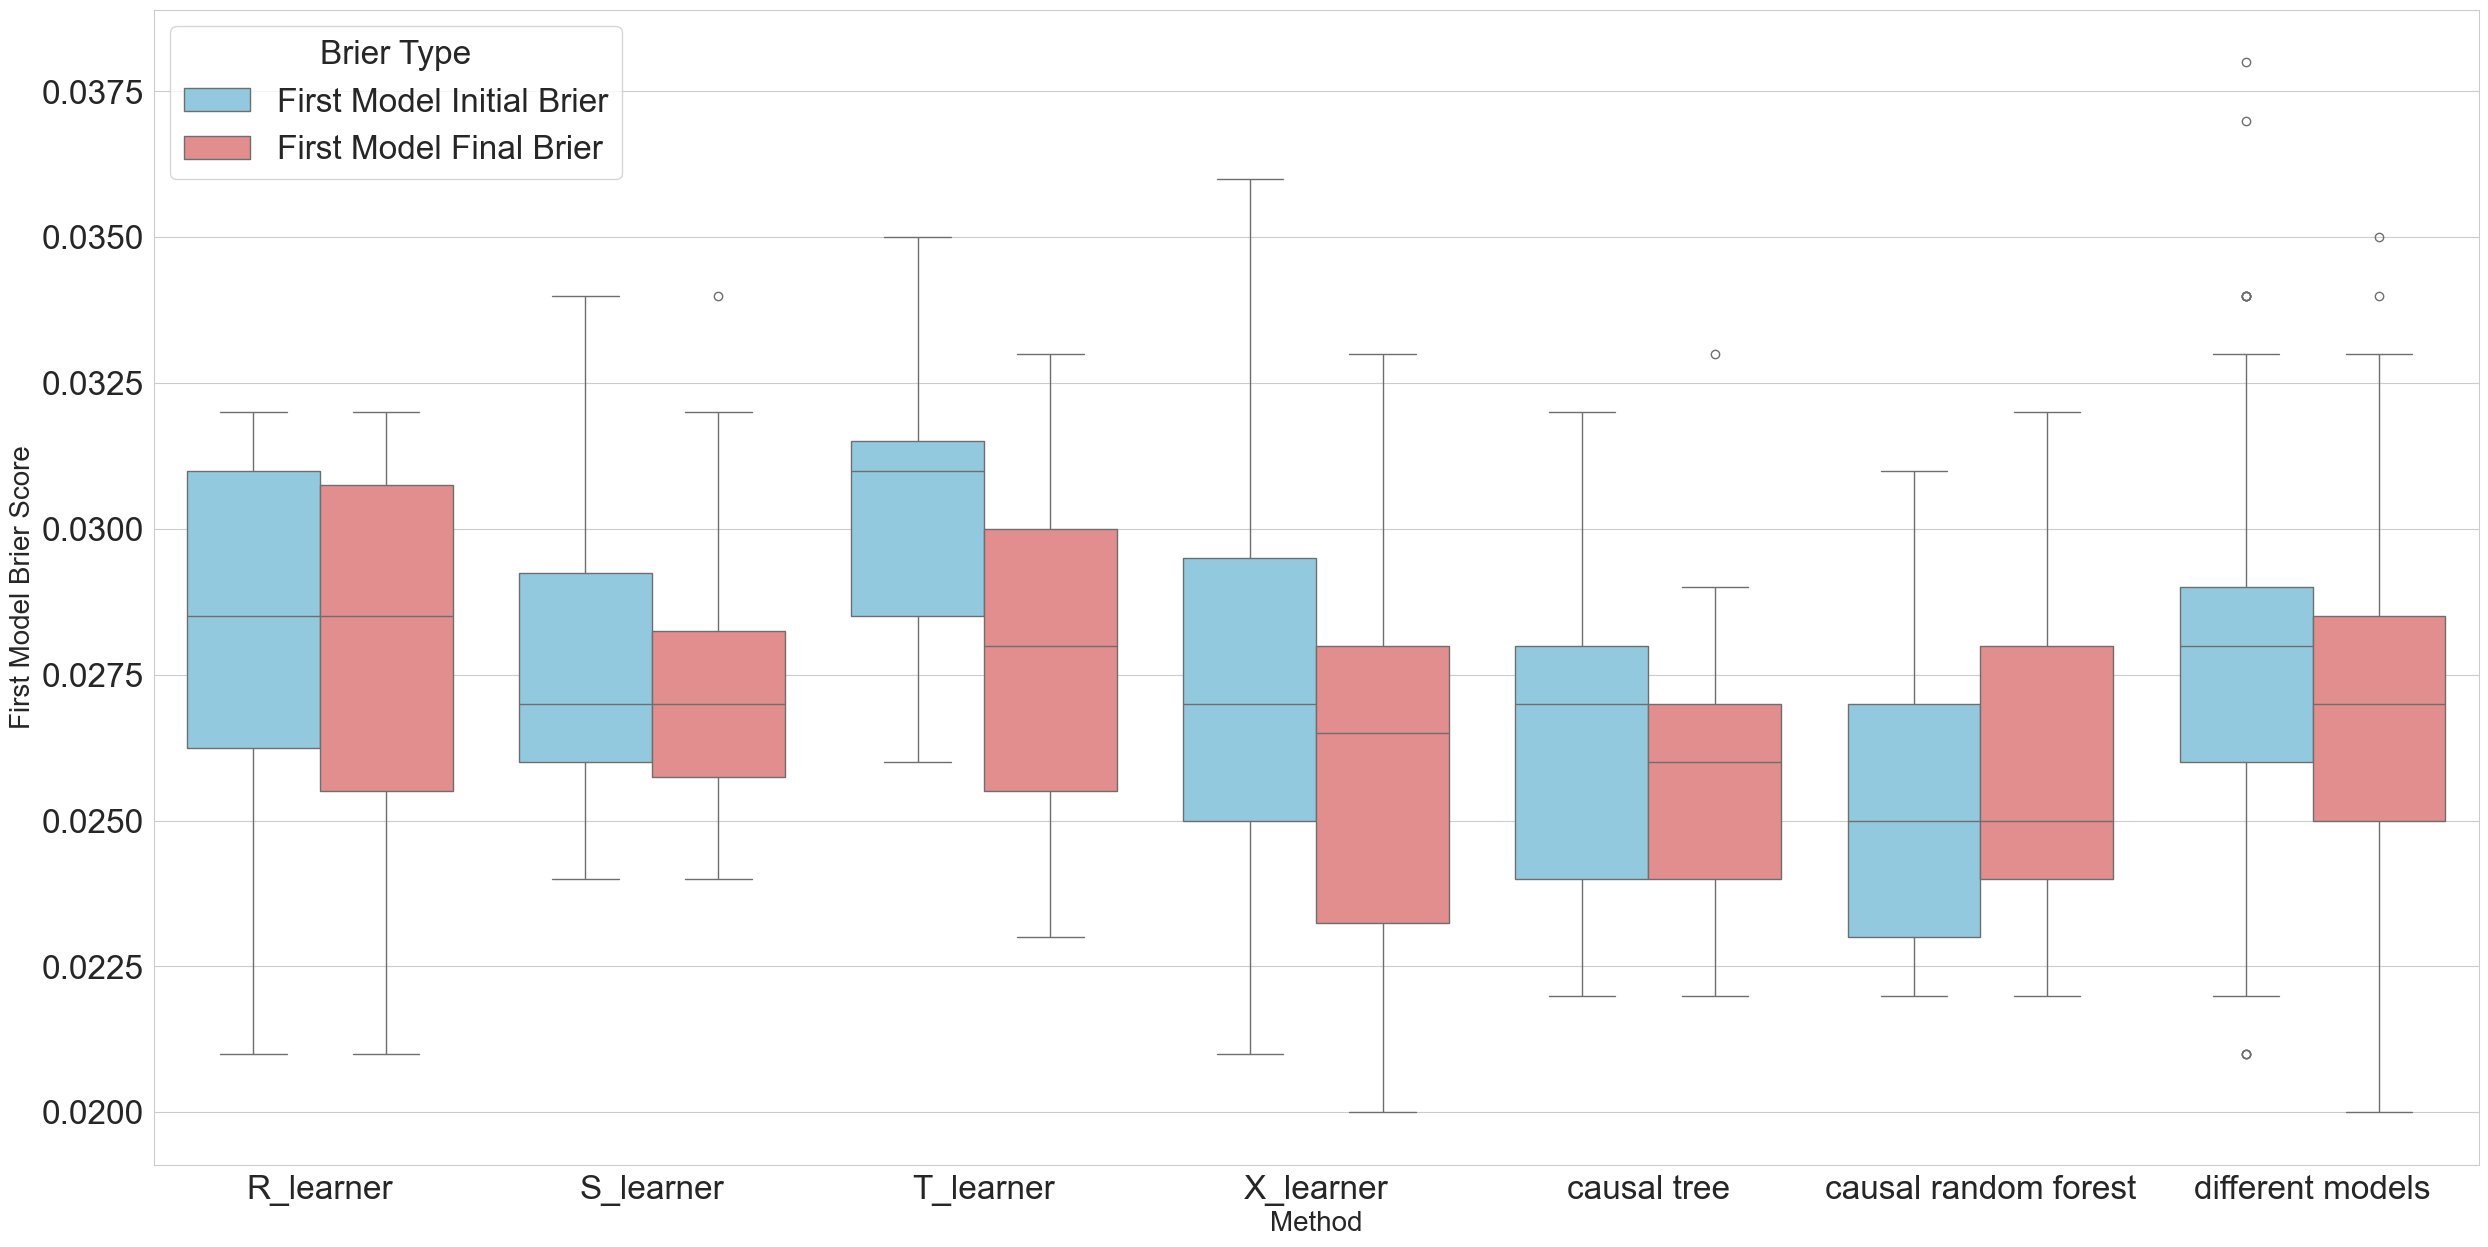

<Figure size 640x480 with 0 Axes>

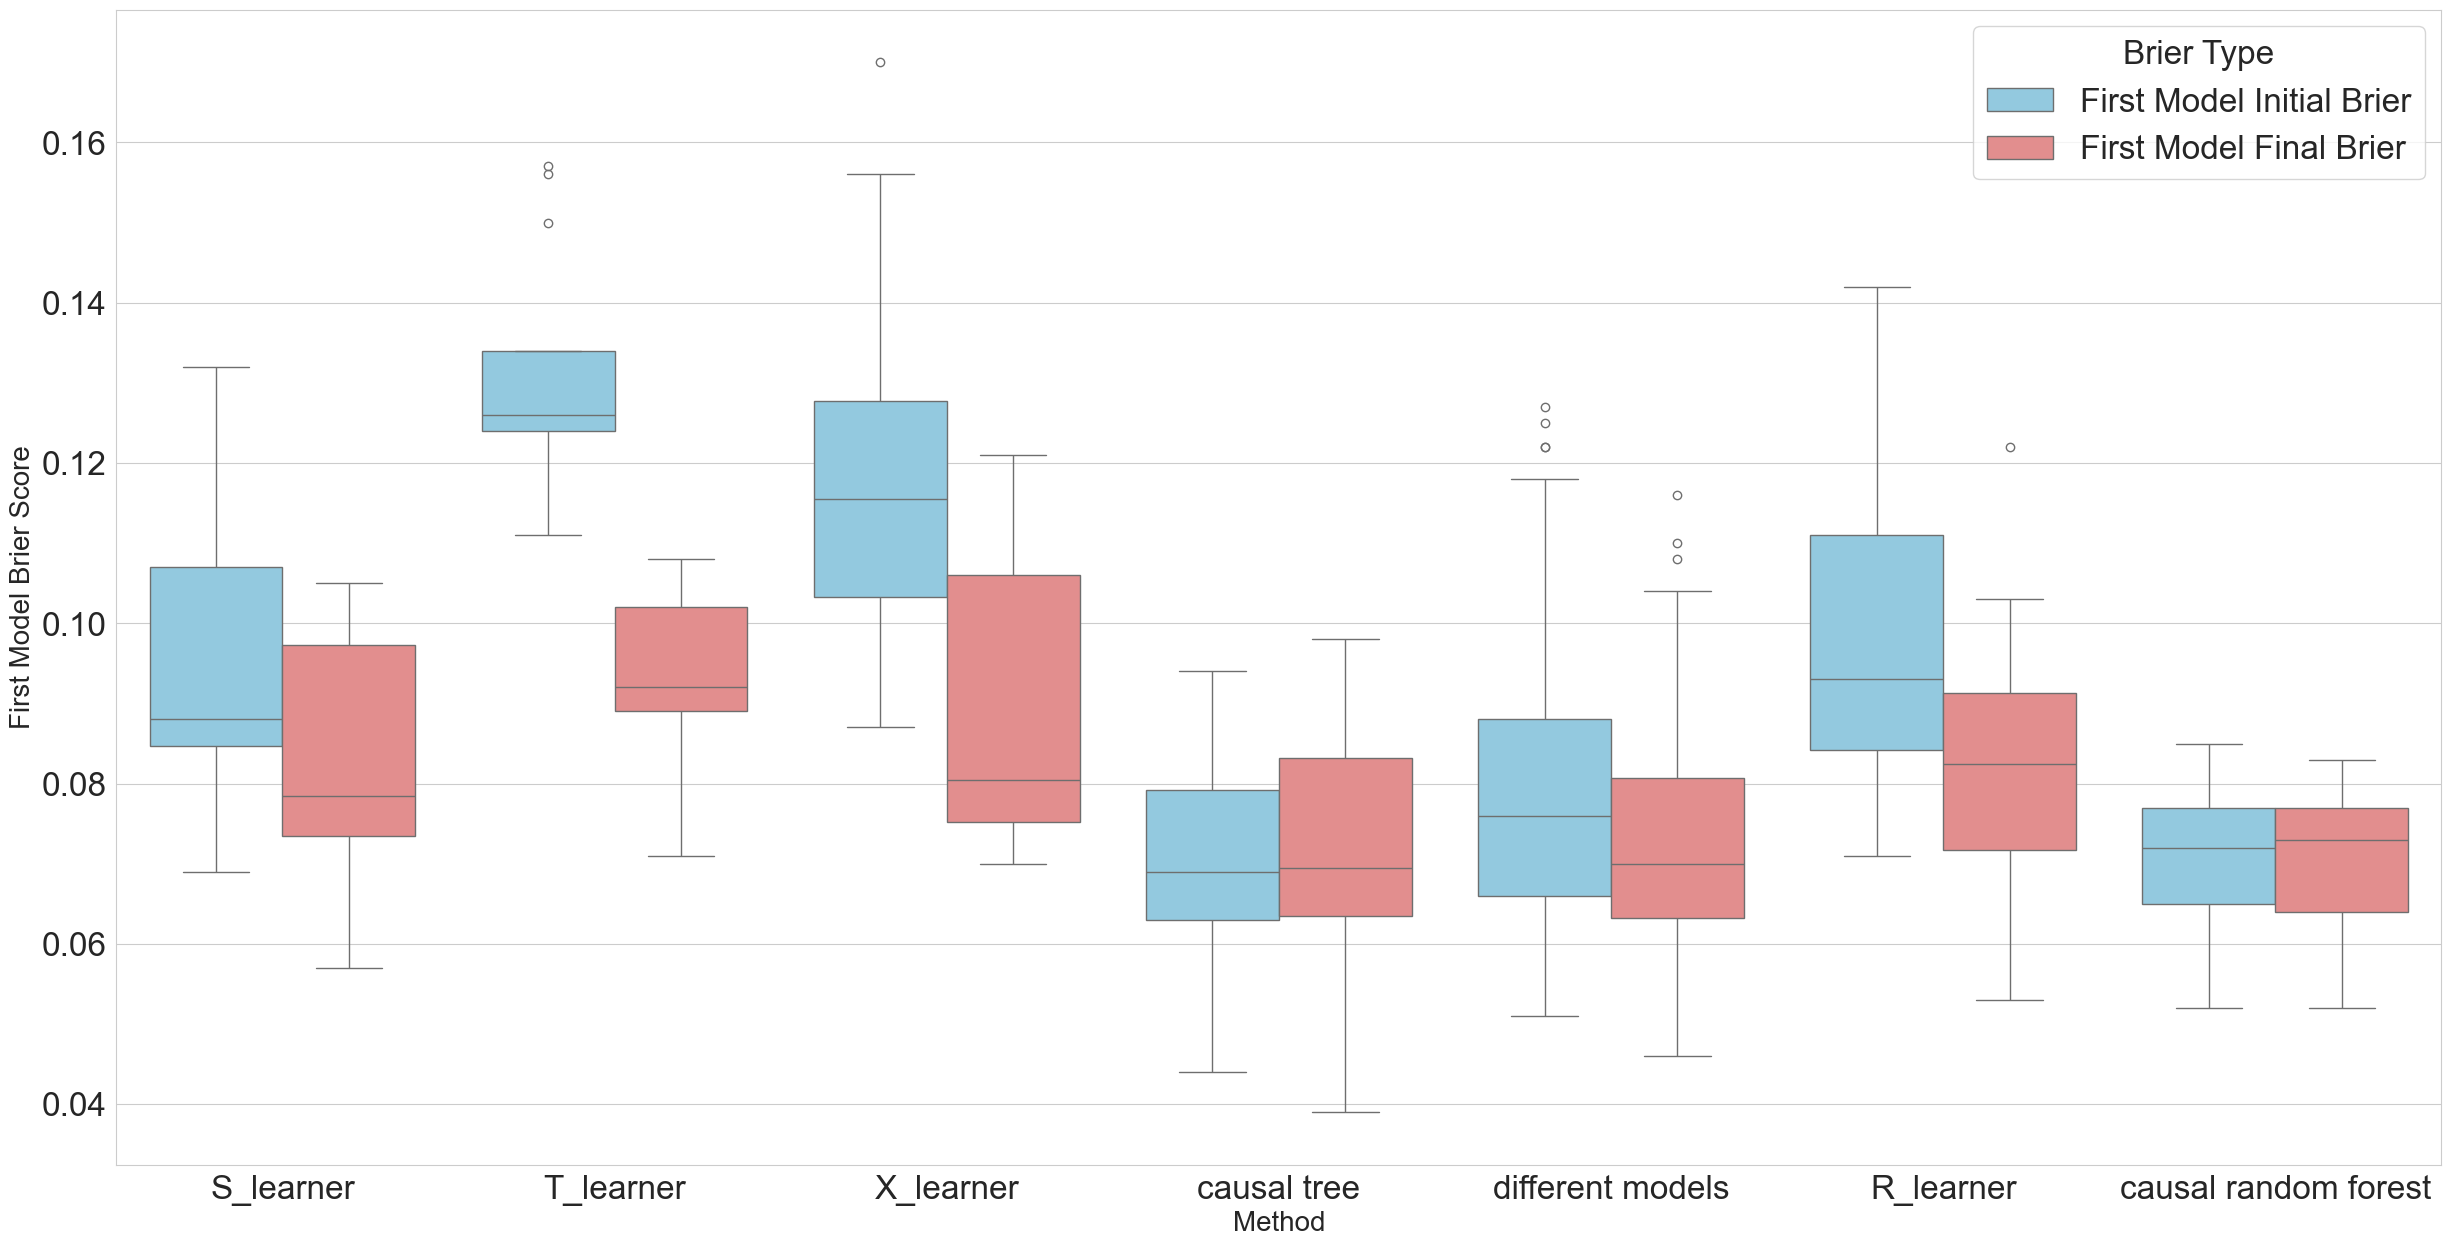

<Figure size 640x480 with 0 Axes>

In [20]:
datasets = [df_twin, df_national]
titles = ['Twin Data', 'National Study Data']

# fig, axes = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
# Loop through each dataset and create a plot
for i, (df, title) in enumerate(zip(datasets, titles)):
    fig, ax = plt.subplots(1, figsize=(30, 15), sharey=True)  # 2x4 grid (even though we only need 7)
    # ax = axes[0]
    # df.loc[df['Method'] == 'Different_Models', 'Models'] = 'different models'
    initial_color = 'skyblue'
    final_color = 'lightcoral'
    
    # df_subset = df[df['Method'] == 'Different_Data']
    df_melted = pd.melt(df, id_vars=['Models'], 
                       value_vars=['First Model Initial Brier', 'First Model Final Brier'], 
                            var_name='Brier Type', value_name='Brier Score')
    
    sns.boxplot(x='Models', y='Brier Score', hue='Brier Type', data=df_melted, 
                    ax=ax, palette={'First Model Initial Brier': initial_color, 'First Model Final Brier': final_color})
    
    # Set the title for each subplot
    # ax.set_title('', fontsize=16)
    
    # Set labels for each subplot
    ax.set_xlabel('Method', fontsize=20)
    ax.set_ylabel('First Model Brier Score', fontsize=20)
    # ax.get_legend().remove()
    
    
    handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper center', ncol=2, title='Disagreement', bbox_to_anchor=(0.5, 1.05), fontsize=16)
    
    plt.rcParams.update({
    'axes.labelsize': 30,  # Font size for axis labels
    'axes.titlesize': 36,  # Font size for plot titles
    'xtick.labelsize': 24,  # Font size for x-axis tick labels
    'ytick.labelsize': 24,  # Font size for y-axis tick labels
    'legend.fontsize': 24,  # Font size for legend
    'font.size': 24         # General font size
})
    plt.show()
    plt.tight_layout()
    
    # Show the plot
    plt.show()